1. Encontrar la transformada inversa de Fourier, tal cual lo hicimos en la última clase, para el número de manchas solares como función del tiempo. Usando las dos frecuencias dominantes. Interprete y analice físicamente el significado de estas dos frecuencias.

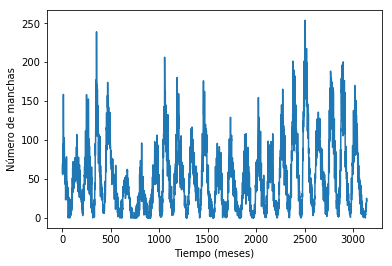

	La periodicidad es aproximadamente de 100 meses.


In [2]:
from pylab import * 
from numpy import *

data = loadtxt("sunspots.txt", float)
plot(data[:,0],data[:,1])
xlabel("Tiempo (meses)")
ylabel("Número de manchas")
#xlim(100,400)
show()
print('\tLa periodicidad es aproximadamente de 100 meses.')

In [3]:
y=data[:,1]
def dft(y):
    #y=loadtxt("sunspots.txt",float)
    N=len(y)
    c=zeros(N//2+1,complex)
    for k in range(N//2+1):
        for n in range(N):
            c[k]+=y[n]*exp(-2j*pi*k*n/N)
    return c

In [4]:
#y=loadtxt("sunspots.txt",float)
c=dft(y)

N =  3143
C_0 =  163198.7000000001
C_24 =  44881.3672510328


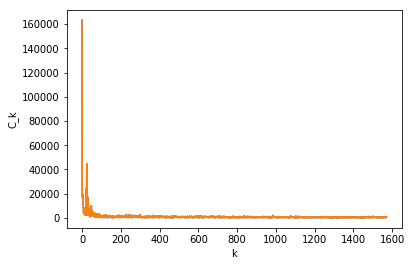

In [29]:
plot(abs(c))
print("N = ",len(y))
print("C_0 = ",abs(c[0]))
print("C_24 = ",abs(c[24]))
plot(abs(c))
xlabel("k")
ylabel("C_k")

#xlim(-1,30)
#ylim(550,600)
show()

In [27]:
from cmath import *
def yn(a):
    N=len(a)
    for n in range(N):
        y[n]=(c[0]/N)*(cos(0*pi*n/N)+1j*sin(0*pi*n/N))
        y[n]=(c[24]/N)*(cos(48*pi*n/N)+1j*sin(48*pi*n/N))
    return y

/home/usuario/.local/lib/python3.5/site-packages/ipykernel_launcher.py:5: ComplexWarning: Casting complex values to real discards the imaginary part
  """
/home/usuario/.local/lib/python3.5/site-packages/ipykernel_launcher.py:6: ComplexWarning: Casting complex values to real discards the imaginary part
  


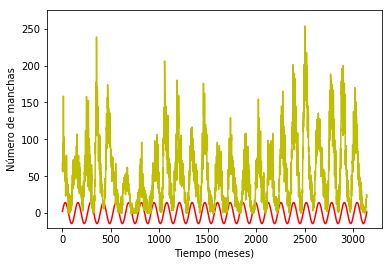

In [36]:
a=loadtxt("sunspots.txt",float)
b=yn(a)
plot(b,'r') #Transformada inversa
plot(a[:,0],a[:,1],'y') #Función original
xlabel("Tiempo (meses)")
ylabel("Número de manchas")
ylim(-20,275)
show()

2. Ejercicio 7.4: filtrado y suavizado de Fourier

En los recursos en línea encontrará un archivo llamado dow.txt. Contiene el valor de cierre diario para cada día hábil desde finales de 2006 hasta finales de 2010 del Dow Jones Industrial Average, que es una medida de los precios promedio en el mercado de valores de EE. UU. Escriba un programa para hacer lo siguiente;

a) Lea los datos de dow. txt y trazarlos en un gráfico.

b) Calcule los coeficientes de la transformada discreta de Fourier de los datos utilizando la función rfft de numpy.fft, que produce una matriz de números complejos 1/2 (N) +1.

c) Ahora establezca todos menos el primer 10% de los elementos de esta matriz en cero (es decir, establezca el último 90% en cero pero mantenga los valores del primer 10%).

d) Calcule la transformada inversa de Fourier de la matriz resultante, ceros y todo, usando la función irfft, y grafíquela en la misma gráfica que los datos originales. Es posible que deba variar los colores de las dos curvas para asegurarse de que ambas aparezcan en el grafico. Comenta lo que ves. ¿Qué sucede cuando configura los coeficientes de Fourier en cero?

e) Modifique su programa para que establezca todos menos el primer 2% de los coeficientes a cero y ejecútelo nuevamente.

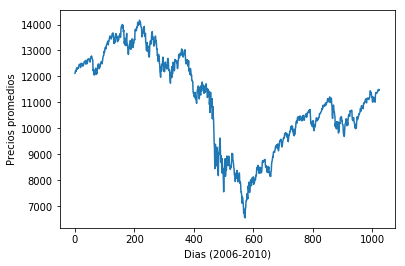

In [147]:
#INCISO A
m=loadtxt("dow.txt",float)
plot(m)
xlabel("Dias (2006-2010)")
ylabel("Precios promedios")
#xlim(100,400)
show()
#print("N = ",len(m))

513


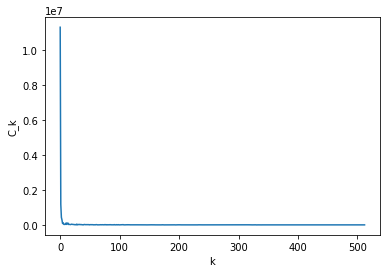

In [148]:
#INCISO B
from numpy.fft import *
p=rfft(m)
plot(abs(p))
#xlim(-1,20)
xlabel("k")
ylabel("C_k")
print(len(p))
show()


In [149]:
#INCISO C
l=[]
for n in range(len(p)):
    if n<len(p)//10:
        g=p[n]
        l.append(g)
        #print(len(l))
    if n>=len(p)//10:
        g=p[n]*0
        l.append(g)
#print(l)

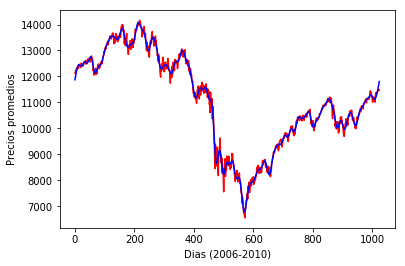

In [150]:
#INCISO D
o=irfft(l)
plot(m,'r')
plot(o,'b')
xlabel("Dias (2006-2010)")
ylabel("Precios promedios")
show()

Al configurar el 90% de los coeficientes en cero se nota un ajuste muy aproximado de la transformada inversa a la funcion original. Si se mantuviesen los valores originales de la matriz sin configurar ninguno en cero, se podría decir que el ajuste entre las graficas de la función original y la transformada inversa sería exacto. Por tanto, entre más coeficientes se hagan cero, hay un mayor desajuste entre la función original y la inversa.

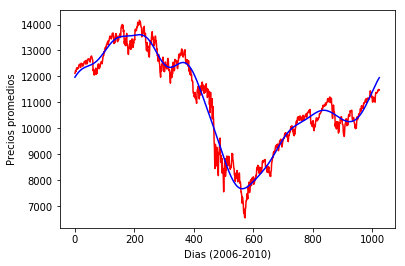

In [153]:
#INCISO E
k=[]
for n in range(len(p)):
    if n<len(p)//50:
        g=p[n]
        k.append(g)
        #print(len(l))
    if n>=len(p)//50:
        g=p[n]*0
        k.append(g)
#print(l)
o=irfft(k)
plot(m,'r')
plot(o,'b')
xlabel("Dias (2006-2010)")
ylabel("Precios promedios")
show()